In [1]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

# 1st Task

### Reading data (measured y values) from csv file

In [2]:
with open('Task_1.csv', newline='') as f:
    reader = csv.reader(f)
    y = [float(item) for item in list(reader)[0]]

### Initialization
We estimate parameters considering the following model:
$$y(k) = \theta_1 y(k − 1) + \theta_2 y(k − 2) + \theta_3 y(k − 3)$$

So the regressor is:
$$X = \begin{bmatrix}y(0) && y(1) && y(2) && ... && y(N-3) \\
                 y(1) && y(2) && y(3) && ... && y(N-2) \\
                 y(2) && y(3) && y(4) && ... && y(N-1)\end{bmatrix}$$
                 
Initial value for $P(k)$:
$$P(t_0) = \bigg[\sum_{k=0}^{t_0}\alpha_k*X(k)*X^T(k)\bigg]^{-1}$$
where $X(k)$ is the $k^{th}$ column of matrix $X$.

Initial value for $\theta$:
$$\hat{\theta}(t_0) = P(t_0) \sum_{k=0}^{t_0}\alpha_k*X(k)*y^T(k)$$

In [3]:
Lambda = .95
alpha = 1
t0 = 10

Y = np.matrix(y[3:])
X = np.matrix(np.vstack((y[:-3],y[1:-2],y[2:-1])))

theta = np.matrix(np.zeros((3,X.shape[1]-t0+1)))
P = np.linalg.inv(alpha*X[:,:t0]*X[:,:t0].T)
theta[:,0] = P * alpha*X[:,:t0]*Y[:,:t0].T
print(P.shape)
print(P)
print(theta.shape)
print(theta[:,0])

(3, 3)
[[8.4420491  2.0221373  2.35332367]
 [2.0221373  7.57602515 2.33994996]
 [2.35332367 2.33994996 5.42275901]]
(3, 988)
[[ 0.53740981]
 [-0.32273182]
 [-0.24080538]]


### Recursive steps
$$P(t) = \frac{1}{\lambda(t)} \bigg[ P(t-1) \frac{P(t-1) X(t) X^T(t) P(t-1)}{\frac{\lambda(t)}{\alpha_t} + X^T(t) P(t-1) X(t)} \bigg]$$
$$\hat{\theta}(t) = \hat{\theta}(t-1) + \alpha_t P(t) X(t) \Big[y(t) - X^T \hat{\theta}(t-1) \Big] $$

[[ 0.47013496]
 [-0.13337767]
 [-0.21865158]]


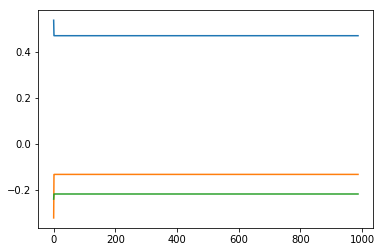

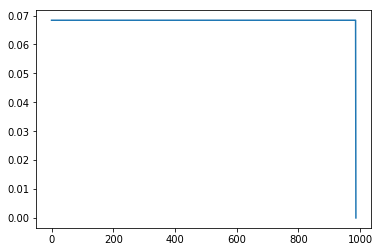

In [4]:
y_pred = np.matrix(np.zeros((1,X.shape[1]-t0)))

for i in range(t0,X.shape[1]):
    P = 1 / Lambda *(P * X[:,i] * X[:,i].T * P) / (Lambda/alpha + X[:,i].T * P * X[:,i])
    theta[:,i-t0+1] = theta[:,i-t0] + alpha * P * X[:,i] * (Y[:,i] - X[:,i].T * theta[:,i-t0])
    y_pred[:,:i-t0] = theta[:,i-t0].T * X[:,i]

print(theta[:,-t0])
plt.plot(theta.T)
plt.show()
plt.plot(y_pred.T)

# 2nd Task

### Reading data (measured y values) from csv file
I will use it as noise data because no input (u) values are provided.

In [5]:
with open('Task_2.csv', newline='') as f:
    reader = csv.reader(f)
    noise = [float(item) for item in list(reader)[0]]

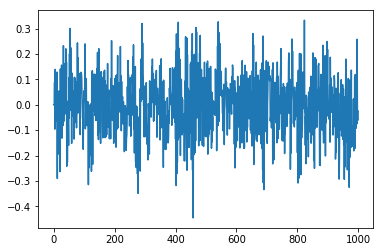

In [6]:
plt.plot(noise)
plt.show()

### Generating data
theta: arbitrarily selected
$\theta = \begin{bmatrix}0.8 \\ 0.2 \\ -0.3 \\ 0.6 \\ 0.2 \\ -0.2\end{bmatrix}$

u: random integer data from the interval [-1,1]

y: output is calculated from input, previous outputs and noise ($\epsilon$)
$$A(q)*y(k) = B(q)*u(k)$$
$$y(k) = \theta_1 y(k-1) + \theta_2 y(k-2) + \theta_3 y(k-3) + \theta_4 u(k-1) + \theta_5 u(k-2) + \theta_6 u(k-3) + \epsilon_k$$

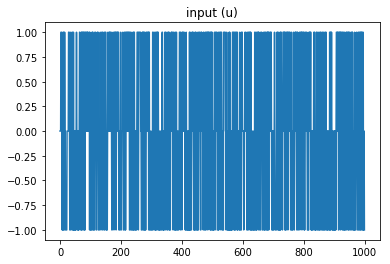

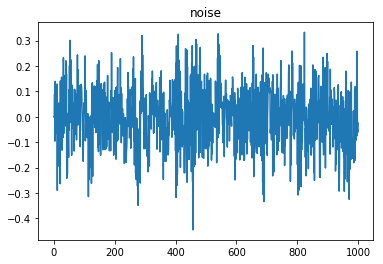

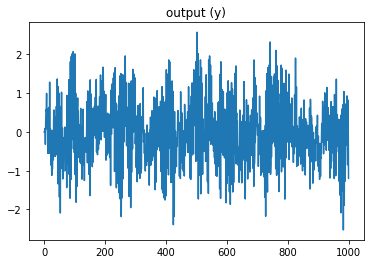

In [7]:
theta = [0.8,0.2,-0.3,0.6,0.2,-0.2] # parameters to be estimated
u = np.random.randint(-1,2,len(noise)) # input
y = np.zeros(len(noise)) # output
for i in range(3,len(noise)):
    y[i] = np.dot(theta[:3],y[i-3:i]) + np.dot(theta[3:],u[i-3:i]) + noise[i]

plt.plot(u)
plt.title('input (u)')
plt.show()
plt.plot(noise)
plt.title('noise')
plt.show()
plt.plot(y)
plt.title('output (y)')
plt.show()

### 1. step: LS estimate of theta
We will predict from previous values of both input and output: $$y(k) = \theta_1 y(k − 1) + \theta_2 y(k − 2) + \theta_3 y(k − 3) + \theta_4 u(k − 1) + \theta_5 u(k − 2) + \theta_6 u(k − 3)$$
So the regressor is:
$$X = \begin{bmatrix}y(0) && y(1) && y(2) && ... && y(N-3) \\
                 y(1) && y(2) && y(3) && ... && y(N-2) \\
                 y(2) && y(3) && y(4) && ... && y(N-1) \\
                 u(0) && u(1) && u(2) && ... && u(N-3) \\
                 u(1) && u(2) && u(3) && ... && u(N-2) \\
                 u(2) && u(3) && u(4) && ... && u(N-1)\end{bmatrix}$$
Then we calculate the LS estimation for the parameters: $$\hat{\theta}_N^{(1)} = \hat{\theta}_N^{LS} = (X * X^T)^{-1} * (X * Y^T)$$

In [8]:
Y = np.matrix(y[3:])
X = np.matrix(np.vstack((y[:-3],y[1:-2],y[2:-1],u[:-3],u[1:-2],u[2:-1])))
theta_ls = np.linalg.inv(X * X.T) * (X * Y.T)
print(Y.shape)
print(X.shape)
print(theta_ls)

(1, 997)
(6, 997)
[[ 0.79340895]
 [ 0.2102975 ]
 [-0.30133091]
 [ 0.59887201]
 [ 0.20970152]
 [-0.19691071]]


### 2. step: construction of the first instruments
Equation  $$y(k) = \theta_1 y(k − 1) + \theta_2 y(k − 2) + \theta_3 y(k − 3) + \theta_4 u(k − 1) + \theta_5 u(k − 2) + \theta_6 u(k − 3)$$ can be rearranged as  $$y(k) - \theta_1 y(k − 1) - \theta_2 y(k − 2) - \theta_3 y(k − 3)  = \theta_4 u(k − 1) + \theta_5 u(k − 2) + \theta_6 u(k − 3)$$ and using another notation: $$\hat{A}^{(1)}_N(q)y(k) = \hat{B}^{(1)}_N(q)u(k)$$

Then we introduce a new instrumental variable as $$z^{(1)}(k) = \hat{G}^{(1)}_N u(k)$$ where $$\hat{G}^{(1)}_N = \frac{\hat{A}^{(1)}_N(q)}{\hat{B}^{(1)}_N(q)}$$

(1000,)


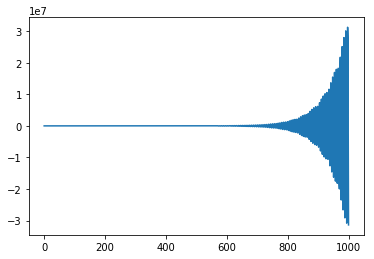

In [9]:
z = np.zeros(len(y))
for i in range(3,len(y)):
    z[i] = -np.dot(theta_ls[:3].A1,z[i-3:i]) + np.dot(theta_ls[3:].A1,u[i-3:i])
print(z.shape)
plt.plot(z);

So the regressor is:
$$\xi^{(1)}_N = \begin{bmatrix}z^{(1)}(0) && z^{(1)}(1) && z^{(1)}(2) && ... && z^{(1)}(N-3) \\
                               z^{(1)}(1) && z^{(1)}(2) && z^{(1)}(3) && ... && z^{(1)}(N-2) \\
                               z^{(1)}(2) && z^{(1)}(3) && z^{(1)}(4) && ... && z^{(1)}(N-1) \\
                               u(0) && u(1) && u(2) && ... && u(N-3) \\
                               u(1) && u(2) && u(3) && ... && u(N-2) \\
                               u(2) && u(3) && u(4) && ... && u(N-1)\end{bmatrix}$$

Then we calculate the first IV estimation for the parameters: $$\hat{\theta}_N^{(2)} = \hat{\theta}_N^{IV} = (\xi^{(1)}_N  * X^T)^{-1} * (\xi^{(1)}_N  * Y^T)$$

In [10]:
# generate a matrix composed of the transpose of instrument vectors
xi_1 = np.matrix(np.vstack((z[:-3],z[1:-2],z[2:-1],u[:-3],u[1:-2],u[2:-1])))

# first IV estimate
theta_iv_1 = np.linalg.inv(xi_1 * X.T) * (xi_1 * Y.T)

print(xi_1.shape)
print(theta_iv_1.shape)
print(theta_iv_1)

(6, 997)
(6, 1)
[[-0.53792413]
 [ 0.53683244]
 [ 0.00116754]
 [ 0.55950621]
 [ 0.1647811 ]
 [-0.13532463]]


### 3.step
Compute the equation error based on the previous IV estimate:
$$\hat{w}^2_N(k) = \hat{A}^{(2)}_N(q)y(k) - \hat{B}^{(2)}_N(q)u(k)$$
where $\hat{A}^{(2)}_N(q)$ and $\hat{B}^{(2)}_N(q)$ calculated in the previous step.

Postulate an AR model of order $n_a + n_b = 3$ based on $w_2$ and estimate its parameters.
The regressor is:
$$X_L = \begin{bmatrix}\hat{w}^2_N(0) && \hat{w}^2_N(1) && \hat{w}^2_N(2) && ... && \hat{w}^2_N(N-3) \\
                       \hat{w}^2_N(1) && \hat{w}^2_N(2) && \hat{w}^2_N(3) && ... && \hat{w}^2_N(N-2) \\
                       \hat{w}^2_N(2) && \hat{w}^2_N(3) && \hat{w}^2_N(4) && ... && \hat{w}^2_N(N-1) \\\end{bmatrix}$$

(1000,)
(3, 1)
[[ 0.68229902]
 [ 0.0270511 ]
 [-0.20092874]]


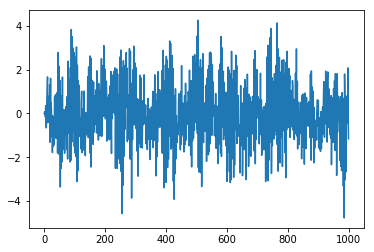

In [11]:
w2 = np.zeros(len(y))

for i in range(3,len(y)):
    w2[i] = y[i] + np.dot(theta_ls[:3].A1,y[i-3:i]) - np.dot(theta_ls[3:].A1,u[i-3:i])

Y_L = np.matrix(w2[3:])
X_L = np.matrix(np.vstack((w2[:-3],w2[1:-2],w2[2:-1])))

L_est = np.linalg.inv(X_L* X_L.T) * (X_L * Y_L.T)
print(w2.shape)
plt.plot(w2)
print(L_est.shape)
print(L_est)

### 4. step (without filtering)
We introduce again a new instrumental variable as $$z^{(2)}(k) = \hat{G}^{(2)}_N u(k)$$ where $$\hat{G}^{(2)}_N = \frac{\hat{A}^{(2)}_N(q)}{\hat{B}^{(2)}_N(q)}$$

So the regressor is:
$$\xi^{(2)}_N = \begin{bmatrix}z^{(2)}(0) && z^{(2)}(1) && z^{(2)}(2) && ... && z^{(2)}(N-3) \\
                               z^{(2)}(1) && z^{(2)}(2) && z^{(2)}(3) && ... && z^{(2)}(N-2) \\
                               z^{(2)}(2) && z^{(2)}(3) && z^{(2)}(4) && ... && z^{(2)}(N-1) \\
                               u(0) && u(1) && u(2) && ... && u(N-3) \\
                               u(1) && u(2) && u(3) && ... && u(N-2) \\
                               u(2) && u(3) && u(4) && ... && u(N-1)\end{bmatrix}$$

Then we calculate the first IV estimation for the parameters: $$\hat{\theta}_N^{(3)} = \hat{\theta}_N^{IV} = (\xi^{(2)}_N  * X^T)^{-1} * (\xi^{(2)}_N  * Y^T)$$

In [12]:
z = np.zeros(len(y))
for i in range(3,len(y)):
    z[i] = -np.dot(theta_iv_1[:3].A1,z[i-3:i]) + np.dot(theta_iv_1[3:].A1,u[i-3:i])

# generate a matrix composed of the transpose of instrument vectors
xi_2 = np.matrix(np.vstack((z[:-3],z[1:-2],z[2:-1],u[:-3],u[1:-2],u[2:-1])))

# first IV estimate
theta_iv_2 = np.linalg.inv(xi_2 * X.T) * (xi_2 * Y.T)

print(xi_2.shape)
print(theta_iv_2.shape)
print(theta_iv_2)

(6, 997)
(6, 1)
[[ 0.81047179]
 [ 0.21304702]
 [-0.30378786]
 [ 0.60006976]
 [ 0.21057191]
 [-0.19723341]]


# 3rd Task

### Reading data (measured y values) from csv file

In [13]:
with open('Task_3.csv', newline='') as f:
    reader = csv.reader(f)
    y_measured = [float(item) for item in list(reader)[0]]

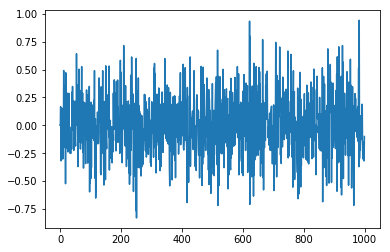

In [14]:
plt.plot(y_measured);

### Calculating probability for given $\theta$ vector
$\theta$ is a $2x1$ column vector: $\begin{bmatrix}\theta_1 \\ \theta_2\end{bmatrix}$

Arbitrary values for $\theta_{initial}$: $\begin{bmatrix} 0.3 \\ 0.3 \end{bmatrix}$

$\sigma_e = 0.3$

$\Sigma = \begin{bmatrix}\sigma_e && 0 \\ 0 && \sigma_e\end{bmatrix}$

Initial probalility for a given $\theta$ vector (2D normal distribution): $$p(\theta \mid D^0)=\frac{1}{\sqrt{(2 \pi)^2 det(\Sigma)}}e^{\frac{1}{2}(\theta-\theta_{initial})\Sigma^{-1}(\theta-\theta_{initial})}$$

Recursive formula to compute probalility for a given $\theta$ vector (1D normal distribution is assumed for $y(k)$): $$p(\theta \mid D^{k}) \propto p(\theta \mid D^{k-1})*p(y(k) \mid D^{k})=p(\theta \mid D^{k-1})*\frac{1}{\sqrt{2 \pi \sigma_e^2}}e^{\frac{-(y(k) - \theta_1*y(k-1) - \theta_2*y(k-2))^2}{\sigma_e^2}}$$

In [15]:
def calc_prob(y,theta,sigma):
    Sigma = sigma * np.eye(2) # eye: that function generates a 2x2 identity matrix
    theta_initial = np.array([0.3,0.3])
    prob = 1 / (2*np.pi*np.linalg.det(Sigma))
    # loop over measured values and substitute the last 3 measured values to the recursive formula
    # len(theta) --> length of theta vector --> 2 in our case
    for i in range(len(theta)+1,len(y)): # Matlab equivalent of that loop: for i = (length(theta)+1):length(y)
        prob = prob * (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-(y[i] - theta[0]*y[i-1] - theta[1]*y[i-2])**2 / sigma**2)
    return prob

### Calculate probability density = probability for the entire parameter space

In [16]:
# Trying all parameter combination from -1 to 1 with step size of 0.05
theta_2 = theta_1 = np.arange(-1,1,.05)
posterior_density = np.zeros((len(theta_1),len(theta_2))) # initialize posterior_density to define its shape
sigma = 0.3
for i,t_1 in enumerate(theta_1):
    for j,t_2 in enumerate(theta_2):
        posterior_density[i,j] = calc_prob(y_measured,[t_1,t_2],sigma)

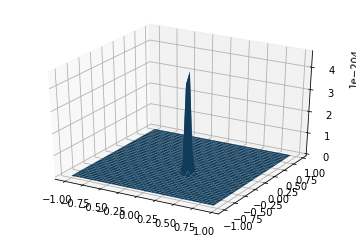

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(theta_1, theta_2)
ax.plot_surface(X, Y, posterior_density);